In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/housing-prices-dataset")

print("Path to dataset files:", path)

100%|██████████| 4.63k/4.63k [00:00<00:00, 653kB/s]

Extracting files...
Path to dataset files: C:\Users\sreec\.cache\kagglehub\datasets\yasserh\housing-prices-dataset\versions\1


## 1 :- Importing The Libraryes


In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle  # For saving the model
import joblib  # Alternative model saving


## 2 :- Load the dataset and perform exploratory data analysis (EDA).


In [15]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['Target'] = housing.target 
print(df.head())  
print(df.info())  


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOc

In [16]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Target'],
      dtype='object')

In [17]:
df.shape

(20640, 9)

# 1.1 Handle missing values appropriately.


In [18]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64

In [19]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# 1. Distribution of Target Variable (House Prices)

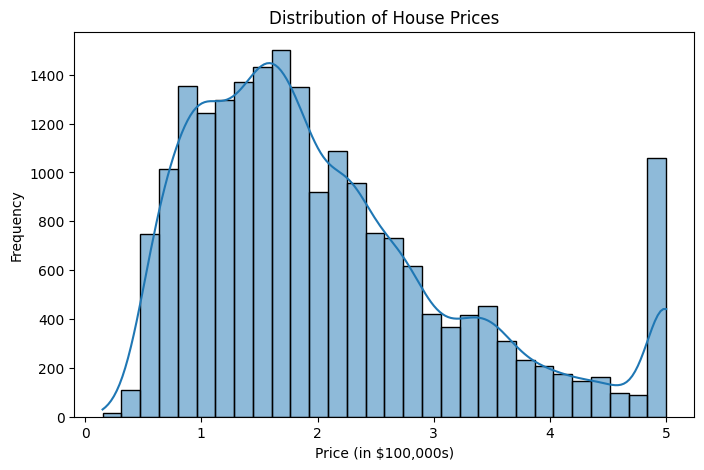

In [20]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Target'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price (in $100,000s)')
plt.ylabel('Frequency')
plt.show()


# Correlation Heatmap

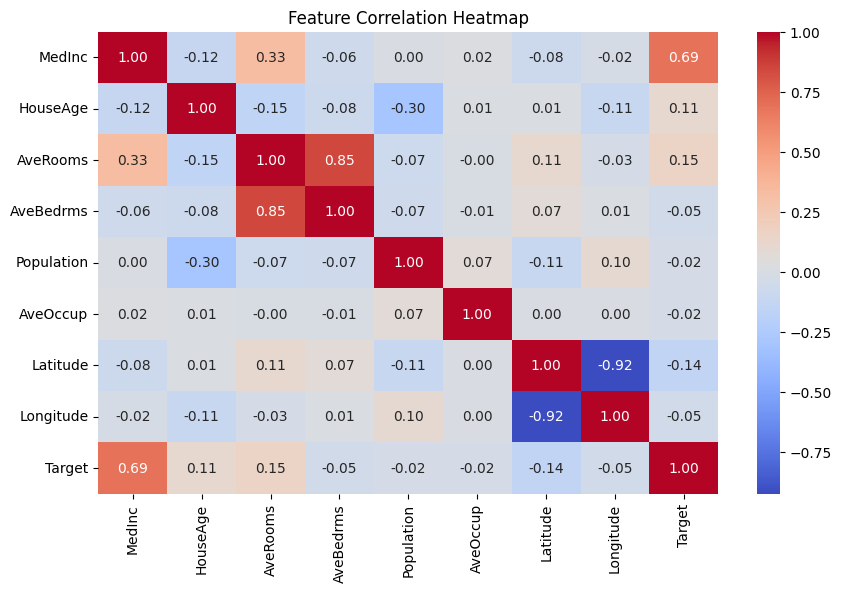

In [21]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()


# Checking for Outliers

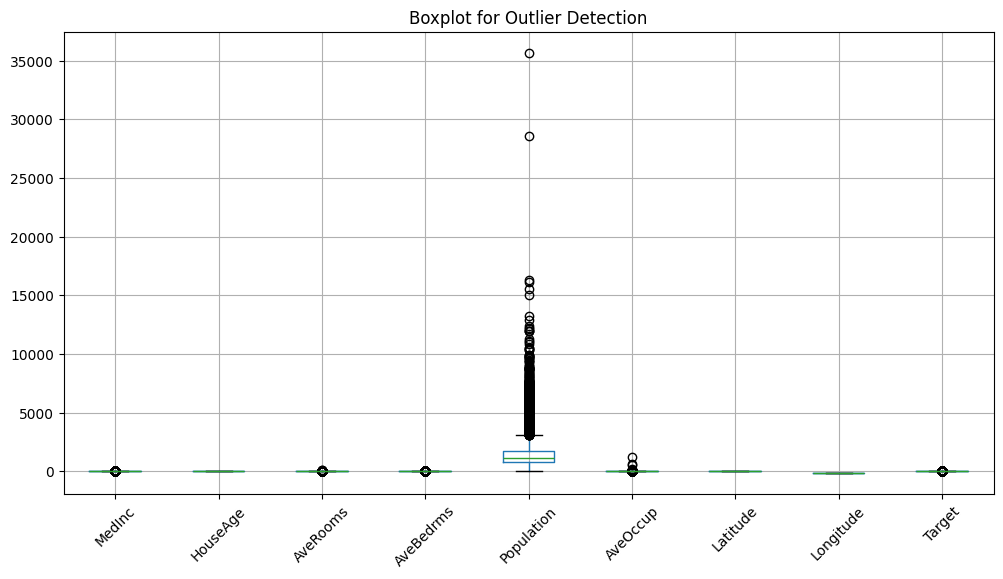

In [22]:
plt.figure(figsize=(12, 6))
df.boxplot(rot=45)  # Rotate labels for better visibility
plt.title('Boxplot for Outlier Detection')
plt.show()


# Checking Relationship Between Features and Target
## 1. Median Income vs House Prices


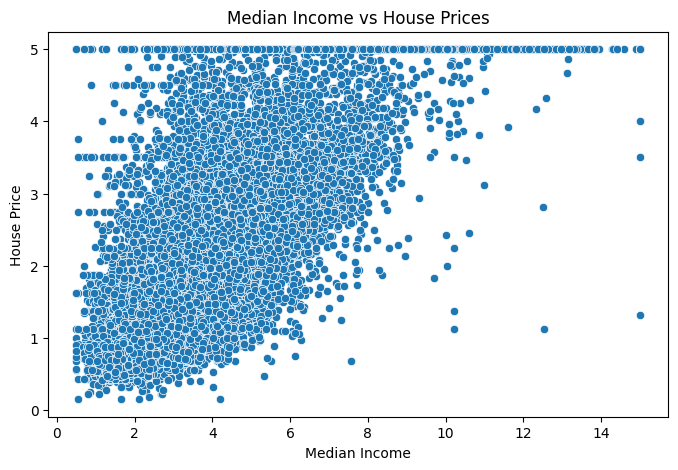

In [23]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['MedInc'], y=df['Target'])
plt.title('Median Income vs House Prices')
plt.xlabel('Median Income')
plt.ylabel('House Price')
plt.show()


# House Age vs House Prices

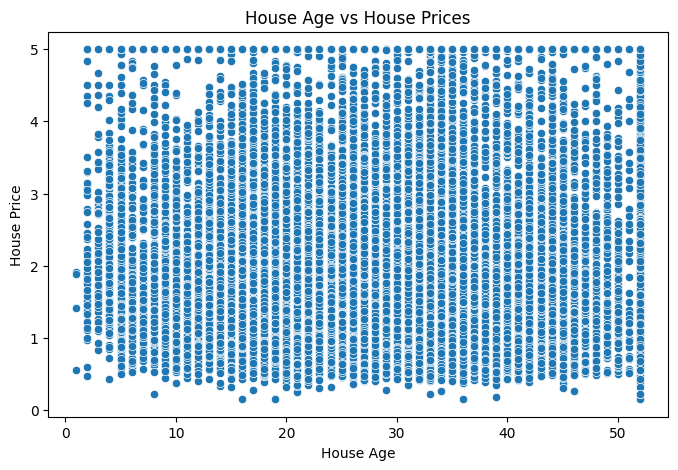

In [24]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['HouseAge'], y=df['Target'])
plt.title('House Age vs House Prices')
plt.xlabel('House Age')
plt.ylabel('House Price')
plt.show()


## Insights from Exploratory Data Analysis (EDA)

* **No Missing Values:** The dataset is clean, with no missing values. ✅
* **House Price Skewness:** House prices exhibit a right-skewed distribution. This indicates that a majority of homes are priced in the lower range. 🏠💰
* **Median Income Correlation:** A strong positive correlation exists between median income and house prices. 📈💵
* **Outlier Detection:** Outliers are present, particularly in the Population and MedInc columns. ⚠️📊
* **Feature Engineering:** Feature engineering may be necessary to enhance model performance. 🛠️📊

## Feature Scaling
#  Standardization

In [25]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
print(df_scaled.head())

     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  2.344766  0.982143  0.628559  -0.153758   -0.974429 -0.049597  1.052548   
1  2.332238 -0.607019  0.327041  -0.263336    0.861439 -0.092512  1.043185   
2  1.782699  1.856182  1.155620  -0.049016   -0.820777 -0.025843  1.038503   
3  0.932968  1.856182  0.156966  -0.049833   -0.766028 -0.050329  1.038503   
4 -0.012881  1.856182  0.344711  -0.032906   -0.759847 -0.085616  1.038503   

   Longitude    Target  
0  -1.327835  2.129631  
1  -1.322844  1.314156  
2  -1.332827  1.258693  
3  -1.337818  1.165100  
4  -1.337818  1.172900  


# Feature Selection
### We use SelectKBest with f_regression to select the top features correlated with the target variabl

In [28]:
X = df.drop(columns=['Target'])  # Features
y = df['Target']  # Target variable

# Select top 5 features based on correlation with target
selector = SelectKBest(score_func=f_regression, k=5)
X_selected = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)


Selected Features: Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Latitude'], dtype='object')


# Updated DataFrame with Selected Features

In [29]:
df_selected = df[selected_features]
df_selected['Target'] = df['Target']  # Add target back
print(df_selected.head())  # Display final dataset

   MedInc  HouseAge  AveRooms  AveBedrms  Latitude  Target
0  8.3252      41.0  6.984127   1.023810     37.88   4.526
1  8.3014      21.0  6.238137   0.971880     37.86   3.585
2  7.2574      52.0  8.288136   1.073446     37.85   3.521
3  5.6431      52.0  5.817352   1.073059     37.85   3.413
4  3.8462      52.0  6.281853   1.081081     37.85   3.422


C:\Users\sreec\AppData\Local\Temp\ipykernel_18256\1301700456.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Target'] = df['Target']  # Add target back


## Summary of Feature Engineering

✅ **Scaling Applied:** Standardization and Normalization techniques were successfully implemented.

✅ **Feature Selection Performed:** The top 5 features, deemed most relevant, have been selected.

✅ **Categorical Encoding Not Required:** All features in the dataset are numerical, eliminating the need for categorical encoding.

**Dataset Ready for Model Training!** 🚀

---

Would you like to proceed with a regression model? 🎯

#  Train-Test Split

In [32]:
# Features and target variable
X = df.drop(columns=['Target'])
y = df['Target']

# Splitting into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use same scaler for test data



## Step 5: Train Regression Models

We will train the following regression models:

* **Linear Regression**
* **Decision Tree**
* **Random Forest**
* **XGBoost**

# 1. Linear Regression

In [33]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)


LinearRegression()

# 2 Decision Tree

In [34]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)


DecisionTreeRegressor(random_state=42)

# 3 Random Forest

In [35]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

# 4 XGBoost

In [36]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train_scaled, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [37]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Model: {model.__class__.__name__}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R² Score: {r2:.4f}")
    print("-" * 40)

# Evaluate all models
evaluate_model(lr_model, X_test_scaled, y_test)
evaluate_model(dt_model, X_test_scaled, y_test)
evaluate_model(rf_model, X_test_scaled, y_test)
evaluate_model(xgb_model, X_test_scaled, y_test)


Model: LinearRegression
RMSE: 0.7456
MAE: 0.5332
R² Score: 0.5758
----------------------------------------
Model: DecisionTreeRegressor
RMSE: 0.7028
MAE: 0.4539
R² Score: 0.6230
----------------------------------------
Model: RandomForestRegressor
RMSE: 0.5051
MAE: 0.3274
R² Score: 0.8053
----------------------------------------
Model: XGBRegressor
RMSE: 0.4718
MAE: 0.3096
R² Score: 0.8301
----------------------------------------


In [38]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best model from GridSearchCV
best_rf_model = grid_search.best_estimator_
print("Best Parameters for Random Forest:", grid_search.best_params_)

# Evaluate the optimized model
evaluate_model(best_rf_model, X_test_scaled, y_test)


Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Model: RandomForestRegressor
RMSE: 0.5038
MAE: 0.3268
R² Score: 0.8063
----------------------------------------


In [39]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# Define parameter distribution
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3]
}

# Initialize model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Apply RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=20,  # Number of combinations to test
    scoring='r2',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Train model
random_search.fit(X_train_scaled, y_train)

# Get best parameters
print("Best Parameters:", random_search.best_params_)

# Evaluate best model
best_xgb_random = random_search.best_estimator_
evaluate_model(best_xgb_random, X_test_scaled, y_test)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 400, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.6}
Model: XGBRegressor
RMSE: 0.4372
MAE: 0.2868
R² Score: 0.8541
----------------------------------------


In [42]:
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_xgb_random, file)
